<a href="https://colab.research.google.com/github/Vigneshthanga/MachineLearning-CMPE257/blob/master/AlternusVera_Sprint4_Political_Bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Course code : CMPE-257
## Group name : The Expendables
## Name: Vignesh Kumar Thangarajan - 014530555


---


## Process

### Data Collection and feature engineering
1.  Load Liar-Liar dataset and Kaggle News Category
2.  Filtered the dataset into two groups of party affiliation
3.  Apply amalgamtion with other two dataset
4.  Train Test Split of data 
5.  Trained two feed forward neural network models using these datasets and predicted the political bias column containing discrete values indicating the biasness level in each data


### Multiclass Classification
1.   Apply XGBoost, RandomForest, Decision Tree on Liar-Liar.
2.   Note the classification report(accuracy, f1-score)

### Amalgamation
1.   Amalgamate Liar-Liar Kaggle News Category and Kaggle Fake News Dataset
2.   Applied 3 classification models

---

## Mounting google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/MLSpring2020/"
base_dir = root_dir + 'the_expendables_AirQuality_Traffic'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Path to Liar Dataset

In [0]:
liarFilepath = base_dir + '/Alternus_vera/liar_dataset/Liardataset.csv'
df = pd.read_csv(liarFilepath, encoding= 'unicode_escape') 

In [4]:
df.head(2)

,json,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.


## Checking the balance of classes

In [5]:
df['class'].value_counts()

half-true      2627
FALSE          2507
mostly-true    2454
barely-true    2103
TRUE           2053
pants-fire     1047
Name: class, dtype: int64

## Preprocessing of text using NLTK packagae

In [6]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Lemmatization

In [0]:
from nltk.stem import WordNetLemmatizer 
def lemmatization(x):
  lemmatizer = WordNetLemmatizer() 
  text = lemmatizer.lemmatize(x)
  return text

## Remove numbers

In [0]:
import re
def removenumbers(x):
  text = re.sub(r'\d+', '', x)
  return text

## Remove special characters

In [0]:
def removespecialchars(x):
  x = str(x)
  x = x.lower()
  regex = re.compile('[^ a-zA-Z]')
  return regex.sub('',x)

## Remove whitespace

In [0]:
def removewhitespace(x):
  text = x.rstrip()
  text = text.lstrip()
  return text

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Word tokenize

In [0]:
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = STOP_WORDS
def removestopwords(x):
  tokens = word_tokenize(x)
  result = [i for i in tokens if not i in stop_words]
  return result

## Stemming

In [0]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer= PorterStemmer()
def stemming(wordList):
  res = []
  for word in wordList:
    res.append(stemmer.stem(word))
  return res

## Parent function for preprocessing

In [0]:
def preprocess_text(x):
  text = removenumbers(x)
  text = removespecialchars(text)
  text = removewhitespace(text)
  wordList = removestopwords(text)
  text = ' '.join(wordList)
  res = lemmatization(text)
  return res

## Shuffling the dataframe for getting the good mix

In [0]:
df = df.sample(frac=1)

In [0]:
df['clean_statement'] = df['statement'].apply(preprocess_text)

In [17]:
df.head(3)

,json,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
754,11079.json,pants-fire,Christian Pastor in Vermont Sentenced to One Y...,"diversity,legal-issues,marriage",blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a headline on the website NewsExaminer,christian pastor vermont sentenced year prison...
5130,6521.json,barely-true,"Says Obama puts 15 unelected, unaccountable bu...",medicare,paul-ryan,U.S. Representative,Wisconsin,republican,19.0,6.0,16.0,14.0,2.0,"a speech in The Villages, Fla.",says obama puts unelected unaccountable bureau...
2483,1619.json,TRUE,The cost to implement Florida's class size ame...,education,don-gaetz,State Senator,Florida,republican,1.0,0.0,3.0,1.0,0.0,debate on the Senate floor.,cost implement floridas class size amendment f...


In [0]:
df = df[['class', 'statement', 'subject', 'speaker', 'speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'clean_statement']]

## All labels in liar liar dataset

In [19]:
df['class'].unique()

array(['pants-fire', 'barely-true', 'TRUE', 'half-true', 'FALSE',
       'mostly-true'], dtype=object)

## Label Encoding the classes using sklearn's label encoder

In [20]:
from sklearn import preprocessing
classlabel_encoder = preprocessing.LabelEncoder()
classlabel_encoder.fit(df['class'])

LabelEncoder()

In [21]:
classlabel_encoder.classes_

array(['FALSE', 'TRUE', 'barely-true', 'half-true', 'mostly-true',
       'pants-fire'], dtype=object)

## Test the transformation of encoding

In [0]:
classEncoded = classlabel_encoder.transform(df['class'])

In [23]:
classEncoded

array([5, 2, 1, ..., 0, 1, 0])

## Test the inverse transform

In [24]:
classlabel_encoder.inverse_transform(classEncoded)

array(['pants-fire', 'barely-true', 'TRUE', ..., 'FALSE', 'TRUE', 'FALSE'],
      dtype=object)

In [25]:
df['class'].astype(str, errors='ignore')

754      pants-fire
5130    barely-true
2483           TRUE
2307      half-true
2488    barely-true
           ...     
7733    mostly-true
1703          FALSE
645           FALSE
3034           TRUE
1305          FALSE
Name: class, Length: 12791, dtype: object

In [26]:
df.dtypes

class                    object
statement                object
subject                  object
speaker                  object
speaker_job_title        object
state_info               object
party_affiliation        object
barely_true_counts      float64
false_counts            float64
half_true_counts        float64
mostly_true_counts      float64
pants_on_fire_counts    float64
context                  object
clean_statement          object
dtype: object

## Splitting the dataset to two groups - all true and all false

In [0]:
#All True
full_true = df.loc[df['class'] == 'TRUE']
most_true = df.loc[df['class'] == 'mostly-true']
half_true = df.loc[df['class'] == 'half-true']

#All False
barely_true = df.loc[df['class'] == 'barely-true']
full_false = df.loc[df['class'] == 'FALSE']
pants_fire = df.loc[df['class'] == 'pants-fire']

In [28]:
half_true.head(2)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
2307,half-true,"Obama ""changed the rules in Washington. Gone a...",ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,a statement by Sen. Claire McCaskill in a TV ad.,obama changed rules washington gone free gifts...
10418,half-true,President Obama and Nancy Pelosi said Obamacar...,health-care,eric-hovde,NaN,NaN,republican,2.0,3.0,3.0,0.0,0.0,a television interview,president obama nancy pelosi said obamacare sa...


In [29]:
full_false.head(2)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
279,FALSE,Says he never said he would keep education fun...,"education,state-budget",rick-scott,Governor,Florida,republican,28.0,23.0,38.0,34.0,7.0,talking about his budget proposal.,says said education funding
1038,FALSE,SaysPresident Obama and his allies in Congress...,health-care,marsha-blackburn,U.S. Representative,Tennessee,republican,2.0,2.0,1.0,0.0,0.0,a press release announcing her vote against th...,sayspresident obama allies congress gave power...


In [30]:
pants_fire.head(2)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
754,pants-fire,Christian Pastor in Vermont Sentenced to One Y...,"diversity,legal-issues,marriage",blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a headline on the website NewsExaminer,christian pastor vermont sentenced year prison...
2932,pants-fire,Says Chuck Hagels nomination as defense secret...,"foreign-policy,military",ted-cruz,Senator,Texas,republican,36.0,33.0,15.0,19.0,8.0,a Politico column.,says chuck hagels nomination defense secretary...


In [31]:
barely_true.head(2)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
5130,barely-true,"Says Obama puts 15 unelected, unaccountable bu...",medicare,paul-ryan,U.S. Representative,Wisconsin,republican,19.0,6.0,16.0,14.0,2.0,"a speech in The Villages, Fla.",says obama puts unelected unaccountable bureau...
2488,barely-true,"Says that according to one economist, $1 of un...","economy,jobs",lloyd-doggett,Texas congressman in the U.S. Houst of Represe...,Texas,democrat,1.0,0.0,2.0,7.0,0.0,an opinion article at HuffingtonPost.com,says according economist unemployment benefits...


In [0]:
ls = full_true.columns

In [33]:
ls

Index(['class', 'statement', 'subject', 'speaker', 'speaker_job_title',
       'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts',
       'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts',
       'context', 'clean_statement'],
      dtype='object')

In [0]:
all_true = pd.concat([full_true, most_true, half_true])
all_false = pd.concat([barely_true,full_false,pants_fire])

In [35]:
all_true['class'].unique()

array(['TRUE', 'mostly-true', 'half-true'], dtype=object)

In [36]:
all_false['class'].unique()

array(['barely-true', 'FALSE', 'pants-fire'], dtype=object)

In [0]:
all_true = all_true[['class', 'clean_statement', 'context', 'subject', 'speaker', 'speaker_job_title','state_info','party_affiliation','half_true_counts','mostly_true_counts']]
all_false = all_false[['class', 'clean_statement', 'context', 'subject', 'speaker', 'speaker_job_title','state_info','party_affiliation','barely_true_counts','false_counts','pants_on_fire_counts']]

In [0]:
features = ['clean_statement']

#All_True

## Applying label encoding for the labels in all true dataset

In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(all_true['class'])

LabelEncoder()

In [0]:
label = le.transform(all_true['class'])

In [41]:
le.transform(all_true['class'])

array([0, 0, 0, ..., 1, 1, 1])

In [42]:
np.unique(label, return_index=True)

(array([0, 1, 2]), array([   0, 4507, 2053]))

In [0]:
y = label

In [44]:
le.inverse_transform(y)

array(['TRUE', 'TRUE', 'TRUE', ..., 'half-true', 'half-true', 'half-true'],
      dtype=object)

In [45]:
import pandas as pd
from collections import Counter
import re
import numpy as np
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import f1_score, accuracy_score , recall_score , precision_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


## Random forest model for label re-classification

In [0]:
rfmodel = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

In [0]:
temp = all_true[features]

In [48]:
temp.head(3)

,clean_statement
2483,cost implement floridas class size amendment f...
53,created new jobs cut unemployment rate half to...
6792,prevent terror suspects boarding airplane fbi ...


In [49]:
temp.shape


(7134, 1)

In [0]:
X_title_text = all_true.clean_statement.values

In [0]:
tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=(1,2),max_df= 0.85, min_df= 0.01)

In [0]:
X_title_tfidf = tfidf.fit_transform (X_title_text)

In [53]:
rfmodel.fit(X_title_tfidf, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
newscategoryFilepath = base_dir + '/Alternus_vera/News_Category.csv'

In [0]:
df_newscat = pd.read_csv(newscategoryFilepath)

In [0]:
df_newscat = df_newscat.loc[df_newscat['category'] == 'POLITICS']

In [57]:
df_newscat.head(4)

,category,headline,authors,link,short_description,date
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,5/26/18
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,5/26/18
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",5/26/18
16,POLITICS,Booyah: Obama Photographer Hilariously Trolls ...,Mary Papenfuss,https://www.huffingtonpost.com/entry/obama-pho...,Just a peeping minute.,5/26/18


In [0]:
df_newscat=df_newscat.dropna()

In [0]:
df_newscat['clean_text'] = df_newscat.apply(lambda row: preprocess_text(str(row['short_description'])), axis=1)

In [60]:
X_title_tfidf.shape

(7134, 150)

In [0]:
X_clean_text = df_newscat.clean_text.values

In [0]:
X_text_tfidf = tfidf.fit_transform(X_clean_text)

In [63]:
X_text_tfidf.shape

(26913, 84)

In [0]:
A=X_text_tfidf.toarray()

In [0]:
A = np.pad(A, ((0,0),(0,66)), mode='constant')

In [66]:
A.shape

(26913, 150)

In [0]:
y_pred = rfmodel.predict(A)

In [68]:
np.unique(le.inverse_transform(y_pred))

array(['half-true', 'mostly-true'], dtype=object)

In [0]:
df_newscat['textlabel'] = le.inverse_transform(y_pred)

In [70]:
df_newscat.head(5)

,category,headline,authors,link,short_description,date,clean_text,textlabel
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,5/26/18,month health human services official revealed ...,half-true
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,5/26/18,wiretaps feature conversations alexander torsh...,half-true
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",5/26/18,dont count robert mueller nail nsa whistleblow...,half-true
16,POLITICS,Booyah: Obama Photographer Hilariously Trolls ...,Mary Papenfuss,https://www.huffingtonpost.com/entry/obama-pho...,Just a peeping minute.,5/26/18,peeping minute,half-true
17,POLITICS,Ireland Votes To Repeal Abortion Amendment In ...,Laura Bassett,https://www.huffingtonpost.com/entry/results-f...,Irish women will no longer have to travel to t...,5/26/18,irish women longer travel united kingdom end p...,half-true


In [71]:
df_newscat['textlabel'].value_counts()

half-true      26479
mostly-true      434
Name: textlabel, dtype: int64

#All_False

In [72]:
from sklearn import preprocessing
le_false = preprocessing.LabelEncoder()
le_false.fit(all_false['class'])

LabelEncoder()

In [0]:
label_false = le_false.transform(all_false['class'])

In [74]:
le_false.transform(all_false['class'])

array([1, 1, 1, ..., 2, 2, 2])

In [75]:
np.unique(label_false, return_index=True)

(array([0, 1, 2]), array([2103,    0, 4610]))

In [0]:
y_false = label_false

In [77]:
le_false.inverse_transform(y_false)

array(['barely-true', 'barely-true', 'barely-true', ..., 'pants-fire',
       'pants-fire', 'pants-fire'], dtype=object)

In [78]:
y_false

array([1, 1, 1, ..., 2, 2, 2])

###Random Forest Classifier

In [0]:
rfmodel_false = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

In [0]:
False_text = all_false.clean_statement.values

In [0]:
tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=(1,2),max_df= 0.85, min_df= 0.01)
False_features_tfidf = tfidf.fit_transform (False_text)

In [83]:
rfmodel_false.fit(False_features_tfidf, y_false)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

##Importing Fake news Dataset

In [0]:
fake_news = base_dir + '/Alternus_vera/fake.csv'
df_fake = pd.read_csv(fake_news) 

In [87]:
df_fake.head(2)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias


In [88]:
df_fake.language.unique()

array(['english', 'ignore', 'german', 'french', 'spanish', 'russian',
       'greek', 'finnish', 'portuguese', 'arabic', 'dutch', 'italian',
       'turkish', 'norwegian', 'chinese', 'polish'], dtype=object)

In [0]:
df_fake = df_fake[df_fake['language'] == 'english']

In [0]:
# df_fake.head(2)

In [0]:
df1_fake = df_fake[['author', 'title', 'text', 'site_url', 'domain_rank']]

In [92]:
df1_fake.head(2)

,author,title,text,site_url,domain_rank
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com,25689.0
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,25689.0


In [93]:
df1_fake.dtypes

author          object
title           object
text            object
site_url        object
domain_rank    float64
dtype: object

In [94]:
df1_fake.shape

(12403, 5)

In [0]:
df1_fake = df1_fake.dropna()

In [96]:
df1_fake['clean_title'] = df1_fake.apply(lambda row: preprocess_text(str(row['title'])), axis=1)
df1_fake.head()

,author,title,text,site_url,domain_rank,clean_title
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com,25689.0,muslims busted stole millions govt benefits
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,25689.0,attorney general loretta lynch plead fifth
2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup.com,25689.0,breaking weiner cooperating fbi hillary email ...
3,Fed Up,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup.com,25689.0,pin drop speech father daughter kidnapped kill...
4,Fed Up,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup.com,25689.0,fantastic trumps point plan reform healthcare ...


In [97]:
df1_fake.shape

(5993, 6)

In [98]:
fake_text = df1_fake.clean_title.values
fake_text[0]

'muslims busted stole millions govt benefits'

In [0]:
fake_features_tfidf = tfidf.fit_transform (fake_text)

In [100]:
fake_features_tfidf.shape

(5993, 45)

In [101]:
False_features_tfidf.shape

(5657, 133)

In [102]:
rfmodel_false.fit(False_features_tfidf, y_false)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Padding the array

In [0]:
A=fake_features_tfidf.toarray()

In [104]:
A.shape

(5993, 45)

In [0]:
A = np.pad(A, ((0,0),(0,88)), mode='constant')

In [106]:
A.shape

(5993, 133)

In [0]:
y_pred= rfmodel_false.predict(A)

In [108]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [109]:
np.unique(y_pred)

array([0])

In [110]:
np.unique(le_false.inverse_transform(y_pred))

array(['FALSE'], dtype=object)

In [0]:
df1_fake['textlabel'] = le_false.inverse_transform(y_pred)

In [112]:
df1_fake['textlabel'].value_counts()

FALSE    5993
Name: textlabel, dtype: int64

In [113]:
df1_fake.head(3)

,author,title,text,site_url,domain_rank,clean_title,textlabel
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com,25689.0,muslims busted stole millions govt benefits,FALSE
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,25689.0,attorney general loretta lynch plead fifth,FALSE
2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup.com,25689.0,breaking weiner cooperating fbi hillary email ...,FALSE


In [0]:
df2_fake = df1_fake[['text', 'author', 'clean_title', 'textlabel']]

In [115]:
df1_fake.head(4)

,author,title,text,site_url,domain_rank,clean_title,textlabel
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com,25689.0,muslims busted stole millions govt benefits,FALSE
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,25689.0,attorney general loretta lynch plead fifth,FALSE
2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup.com,25689.0,breaking weiner cooperating fbi hillary email ...,FALSE
3,Fed Up,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup.com,25689.0,pin drop speech father daughter kidnapped kill...,FALSE


In [116]:
df_newscat.head(3)

,category,headline,authors,link,short_description,date,clean_text,textlabel
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,5/26/18,month health human services official revealed ...,half-true
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,5/26/18,wiretaps feature conversations alexander torsh...,half-true
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",5/26/18,dont count robert mueller nail nsa whistleblow...,half-true


In [0]:
df2_newscat = df_newscat[['clean_text', 'authors', 'headline', 'textlabel']]

In [118]:
df_newscat.head(4)

,category,headline,authors,link,short_description,date,clean_text,textlabel
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,5/26/18,month health human services official revealed ...,half-true
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,5/26/18,wiretaps feature conversations alexander torsh...,half-true
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",5/26/18,dont count robert mueller nail nsa whistleblow...,half-true
16,POLITICS,Booyah: Obama Photographer Hilariously Trolls ...,Mary Papenfuss,https://www.huffingtonpost.com/entry/obama-pho...,Just a peeping minute.,5/26/18,peeping minute,half-true


In [119]:
df.head(3)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
754,pants-fire,Christian Pastor in Vermont Sentenced to One Y...,"diversity,legal-issues,marriage",blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a headline on the website NewsExaminer,christian pastor vermont sentenced year prison...
5130,barely-true,"Says Obama puts 15 unelected, unaccountable bu...",medicare,paul-ryan,U.S. Representative,Wisconsin,republican,19.0,6.0,16.0,14.0,2.0,"a speech in The Villages, Fla.",says obama puts unelected unaccountable bureau...
2483,TRUE,The cost to implement Florida's class size ame...,education,don-gaetz,State Senator,Florida,republican,1.0,0.0,3.0,1.0,0.0,debate on the Senate floor.,cost implement floridas class size amendment f...


In [0]:
df_liar = df[['clean_statement', 'speaker', 'subject', 'class']]

In [121]:
df.head(4)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
754,pants-fire,Christian Pastor in Vermont Sentenced to One Y...,"diversity,legal-issues,marriage",blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a headline on the website NewsExaminer,christian pastor vermont sentenced year prison...
5130,barely-true,"Says Obama puts 15 unelected, unaccountable bu...",medicare,paul-ryan,U.S. Representative,Wisconsin,republican,19.0,6.0,16.0,14.0,2.0,"a speech in The Villages, Fla.",says obama puts unelected unaccountable bureau...
2483,TRUE,The cost to implement Florida's class size ame...,education,don-gaetz,State Senator,Florida,republican,1.0,0.0,3.0,1.0,0.0,debate on the Senate floor.,cost implement floridas class size amendment f...
2307,half-true,"Obama ""changed the rules in Washington. Gone a...",ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,a statement by Sen. Claire McCaskill in a TV ad.,obama changed rules washington gone free gifts...


## Computing Political bias feature using Party Affiliation

In [122]:
df.party_affiliation.unique()

array(['none', 'republican', 'democrat', 'organization', 'independent',
       'constitution-party', 'libertarian', 'columnist', 'activist',
       'newsmaker', 'journalist', 'labor-leader', nan, 'talk-show-host',
       'business-leader', 'county-commissioner', 'education-official',
       'state-official', 'tea-party-member', 'government-body',
       'liberal-party-canada', 'ocean-state-tea-party-action',
       'democratic-farmer-labor', 'green', 'Moderate'], dtype=object)

In [0]:
trainpb = df[['statement', 'party_affiliation']]

## All 24 classes in party affiliation

In [124]:
df.party_affiliation.value_counts()

republican                      5665
democrat                        4137
none                            2181
organization                     264
independent                      180
newsmaker                         64
libertarian                       51
journalist                        49
activist                          45
columnist                         44
talk-show-host                    32
state-official                    24
labor-leader                      15
business-leader                   11
tea-party-member                  10
green                              3
constitution-party                 3
education-official                 3
county-commissioner                2
government-body                    2
Moderate                           1
liberal-party-canada               1
ocean-state-tea-party-action       1
democratic-farmer-labor            1
Name: party_affiliation, dtype: int64

In [0]:
bias_df = df[(df['party_affiliation'] == 'republican') | (df['party_affiliation'] == 'democrat') | (df['party_affiliation'] == 'libertarian') | (df['party_affiliation'] == 'tea-party-member')]
unbias_df = df[(df['party_affiliation'] == 'none') | (df['party_affiliation'] == 'organization') | (df['party_affiliation'] == 'independent') | (df['party_affiliation'] == 'newsmaker') | (df['party_affiliation'] == 'journalist') | (df['party_affiliation'] == 'columnist') | (df['party_affiliation'] == 'activist') | (df['party_affiliation'] == 'state-official')]

In [126]:
bias_df.party_affiliation.value_counts()

republican          5665
democrat            4137
libertarian           51
tea-party-member      10
Name: party_affiliation, dtype: int64

In [127]:
unbias_df.party_affiliation.value_counts()

none              2181
organization       264
independent        180
newsmaker           64
journalist          49
activist            45
columnist           44
state-official      24
Name: party_affiliation, dtype: int64

## Encoding party affiliation labels to discrete values based on domain understanding


1.   Assumption of Biased news are assigned higher values
2.   Assumption of unbiased news are assigned lower values



In [0]:
def biasLabel(x):
  if (x == 'republican'):
    return 0.9
  elif (x == 'democrat'):
    return 0.7
  elif (x == 'libertarian'):
    return 0.5
  else:
    return 0.5

In [0]:
def unbiasLabel(x):
  if (x == 'organization'):
    return 0.2
  elif (x == 'independent'):
    return 0.4
  elif (x == 'state-official'):
    return 0.35
  else:
    return 0.1

In [130]:
bias_df.shape

(9863, 14)

In [131]:
bias_df['political_bias'] =bias_df['party_affiliation'].apply(biasLabel)
unbias_df['political_bias'] = unbias_df['party_affiliation'].apply(unbiasLabel)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [132]:
unbias_df.shape

(2851, 15)

In [133]:
unbias_df.head(3)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement,political_bias
754,pants-fire,Christian Pastor in Vermont Sentenced to One Y...,"diversity,legal-issues,marriage",blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a headline on the website NewsExaminer,christian pastor vermont sentenced year prison...,0.1
11878,barely-true,Voted the best specialty plate in America,"pop-culture,states,transportation",friends-plum-beach-lighthouse,NaN,Rhode Island,organization,1.0,0.0,0.0,0.0,0.0,A highway billboard,voted best specialty plate america,0.2
2402,barely-true,All University of Texas student-athletes get a...,"education,sports,technology",jody-conradt,"Special assistant, University of Texas",Texas,none,1.0,0.0,0.0,0.0,0.0,a Texas Tribune Festival panel,university texas studentathletes ipad,0.1


In [134]:
bias_df.head(3)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement,political_bias
5130,barely-true,"Says Obama puts 15 unelected, unaccountable bu...",medicare,paul-ryan,U.S. Representative,Wisconsin,republican,19.0,6.0,16.0,14.0,2.0,"a speech in The Villages, Fla.",says obama puts unelected unaccountable bureau...,0.9
2483,TRUE,The cost to implement Florida's class size ame...,education,don-gaetz,State Senator,Florida,republican,1.0,0.0,3.0,1.0,0.0,debate on the Senate floor.,cost implement floridas class size amendment f...,0.9
2307,half-true,"Obama ""changed the rules in Washington. Gone a...",ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,a statement by Sen. Claire McCaskill in a TV ad.,obama changed rules washington gone free gifts...,0.7


In [0]:
X_bias_text = bias_df.clean_statement.values
y = bias_df['political_bias']
X_bias_tfidf = tfidf.fit_transform (X_bias_text)

In [136]:
X_bias_tfidf.shape

(9863, 145)

## Feed Forward Neural Network model

In [137]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [0]:
def bias_model():
	# create model
	model = Sequential()
	model.add(Dense(145, input_dim=145, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [139]:
# evaluate model
estimator = KerasRegressor(build_fn=bias_model, epochs=10, batch_size=1000, verbose=1)
kfold = KFold(n_splits=2)
results = cross_val_score(estimator, X_bias_tfidf, y, cv=kfold)
print("Accuracy: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/10
4931/4931 [==============================] - 2s 348us/step - loss: 0.6047
Epoch 2/10
4931/4931 [==============================] - 0s 4us/step - loss: 0.5139
Epoch 3/10
4931/4931 [==============================] - 0s 4us/step - loss: 0.4203
Epoch 4/10
4931/4931 [==============================] - 0s 4us/step - loss: 0.3236
Epoch 5/10
4931/4931 [==============================] - 0s 4us/step - loss: 0.2288
Epoch 6/10
4931/4931 [==============================] - 0s 5us/step - loss: 0.1452
Epoch 7/10
4931/4931 [==============================] - 0s 5us/step - loss: 0.0840
Epoch 8/10
4931/4931 [==============================] - 0s 3us/step - loss: 0.0522
Epoch 9/10
4931/4931 [==============================] - 0s 4us/step - loss: 0.0460
Epoch 10/10
4932/4932 [==============================] - 0s 6us/step
Epoch 1/10
4932/4932 [==============================] - 0s 13us/step - loss: 0.6447
Epoch 2/10
4932/4932 [==============================] - 0s 4us/step - loss: 0.5629
Epoch 3/10
4932

In [0]:
X_fake_text = df1_fake.clean_title.values
X_fake_tfidf = tfidf.fit_transform (X_fake_text)

In [141]:
X_fake_tfidf.shape

(5993, 45)

In [0]:
A = X_fake_tfidf.toarray()
X_fake_tfidf = np.pad(A, ((0,0),(0,100)), mode='constant')

In [143]:
estimator.fit(X_bias_tfidf, y)

Epoch 1/10
9863/9863 [==============================] - 0s 9us/step - loss: 0.6236
Epoch 2/10
9863/9863 [==============================] - 0s 4us/step - loss: 0.4622
Epoch 3/10
9863/9863 [==============================] - 0s 3us/step - loss: 0.2855
Epoch 4/10
9863/9863 [==============================] - 0s 3us/step - loss: 0.1263
Epoch 5/10
9863/9863 [==============================] - 0s 3us/step - loss: 0.0514
Epoch 6/10
9863/9863 [==============================] - 0s 3us/step - loss: 0.0482
Epoch 7/10
9863/9863 [==============================] - 0s 4us/step - loss: 0.0422
Epoch 8/10
9863/9863 [==============================] - 0s 4us/step - loss: 0.0363
Epoch 9/10
9863/9863 [==============================] - 0s 4us/step - loss: 0.0341
Epoch 10/10
9863/9863 [==============================] - 0s 4us/step - loss: 0.0316


In [144]:
y_fake_pred = estimator.predict(X_fake_tfidf)

5993/5993 [==============================] - 0s 3us/step


In [0]:
X_unbias_text = unbias_df.clean_statement.values
y_unbias = unbias_df['political_bias']
X_unbias_tfidf = tfidf.fit_transform (X_unbias_text)

In [146]:
X_unbias_tfidf.shape

(2851, 136)

## Feed Forward Neural Network model for unbias model

In [0]:
def unbias_model():
	# create model
	model = Sequential()
	model.add(Dense(136, input_dim=136, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_absolute_error', optimizer='adam')
	return model

## Training the model

In [148]:
unbias_estimator = KerasRegressor(build_fn=unbias_model, epochs=10, batch_size=64, verbose=1)
kfold = KFold(n_splits=2)
results = cross_val_score(unbias_estimator, X_unbias_tfidf, y_unbias, cv=kfold)
print("Accuracy: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/10
1425/1425 [==============================] - 0s 72us/step - loss: 0.0728
Epoch 2/10
1425/1425 [==============================] - 0s 36us/step - loss: 0.0453
Epoch 3/10
1425/1425 [==============================] - 0s 37us/step - loss: 0.0400
Epoch 4/10
1425/1425 [==============================] - 0s 35us/step - loss: 0.0378
Epoch 5/10
1425/1425 [==============================] - 0s 36us/step - loss: 0.0362
Epoch 6/10
1425/1425 [==============================] - 0s 36us/step - loss: 0.0351
Epoch 7/10
1425/1425 [==============================] - 0s 36us/step - loss: 0.0347
Epoch 8/10
1425/1425 [==============================] - 0s 37us/step - loss: 0.0341
Epoch 9/10
1425/1425 [==============================] - 0s 38us/step - loss: 0.0337
Epoch 10/10
1426/1426 [==============================] - 0s 23us/step
Epoch 1/10
1426/1426 [==============================] - 0s 75us/step - loss: 0.0708
Epoch 2/10
1426/1426 [==============================] - 0s 37us/step - loss: 0.0389
Epoch 

In [0]:
X_news_text = df_newscat.clean_text.values
X_news_tfidf = tfidf.fit_transform (X_news_text)

In [150]:
X_news_tfidf.shape

(26913, 84)

In [151]:
unbias_estimator.fit(X_unbias_tfidf, y_unbias)

Epoch 1/10
2851/2851 [==============================] - 0s 52us/step - loss: 0.0529
Epoch 2/10
2851/2851 [==============================] - 0s 36us/step - loss: 0.0371
Epoch 3/10
2851/2851 [==============================] - 0s 37us/step - loss: 0.0339
Epoch 4/10
2851/2851 [==============================] - 0s 36us/step - loss: 0.0324
Epoch 5/10
2851/2851 [==============================] - 0s 37us/step - loss: 0.0322
Epoch 6/10
2851/2851 [==============================] - 0s 37us/step - loss: 0.0319
Epoch 7/10
2851/2851 [==============================] - 0s 39us/step - loss: 0.0317
Epoch 8/10
2851/2851 [==============================] - 0s 35us/step - loss: 0.0314
Epoch 9/10
2851/2851 [==============================] - 0s 37us/step - loss: 0.0310
Epoch 10/10
2851/2851 [==============================] - 0s 36us/step - loss: 0.0309


In [0]:
A = X_news_tfidf.toarray()
X_news_tfidf = np.pad(A, ((0,0),(0,52)), mode='constant')

In [153]:
X_news_tfidf.shape

(26913, 136)

In [154]:
y_news_pred = unbias_estimator.predict(X_news_tfidf)

26913/26913 [==============================] - 0s 10us/step


In [0]:
df_newscat['political_bias'] = y_news_pred 
df1_fake['political_bias'] = y_fake_pred

In [156]:
df_newscat.head(3)

,category,headline,authors,link,short_description,date,clean_text,textlabel,political_bias
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,5/26/18,month health human services official revealed ...,half-true,0.106271
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,5/26/18,wiretaps feature conversations alexander torsh...,half-true,0.100257
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",5/26/18,dont count robert mueller nail nsa whistleblow...,half-true,0.103215


In [157]:
df1_fake.head(3)

,author,title,text,site_url,domain_rank,clean_title,textlabel,political_bias
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com,25689.0,muslims busted stole millions govt benefits,FALSE,0.407899
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,25689.0,attorney general loretta lynch plead fifth,FALSE,0.407899
2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup.com,25689.0,breaking weiner cooperating fbi hillary email ...,FALSE,0.902757


In [158]:
bias_df['class'].value_counts()

half-true      2081
FALSE          1941
mostly-true    1913
barely-true    1653
TRUE           1624
pants-fire      651
Name: class, dtype: int64

In [159]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(bias_df['class'])


label = label_encoder.transform(df1_fake['textlabel'])
label_encoder.transform(df1_fake['textlabel'])

np.unique(label, return_index=True)


(array([0]), array([0]))

In [160]:
y = label
df1_fake['class'] = y
label_encoder.inverse_transform(y)

array(['FALSE', 'FALSE', 'FALSE', ..., 'FALSE', 'FALSE', 'FALSE'],
      dtype=object)

In [161]:

label = label_encoder.transform(df_newscat['textlabel'])
label_encoder.transform(df1_fake['textlabel'])

np.unique(label, return_index=True)


(array([3, 4]), array([ 0, 11]))

In [162]:
y = label
df_newscat['class'] = y
label_encoder.inverse_transform(y)

array(['half-true', 'half-true', 'half-true', ..., 'half-true',
       'half-true', 'half-true'], dtype=object)

In [163]:
np.unique(y)

array([3, 4])

In [164]:
label = label_encoder.transform(bias_df['class'])
label_encoder.transform(bias_df['class'])

np.unique(label, return_index=True)

(array([0, 1, 2, 3, 4, 5]), array([5, 1, 0, 2, 9, 8]))

In [165]:
y = label
bias_df['class'] = y
label_encoder.inverse_transform(y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['barely-true', 'TRUE', 'half-true', ..., 'FALSE', 'TRUE', 'FALSE'],
      dtype=object)

In [166]:
bias_df.head(3)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement,political_bias
5130,2,"Says Obama puts 15 unelected, unaccountable bu...",medicare,paul-ryan,U.S. Representative,Wisconsin,republican,19.0,6.0,16.0,14.0,2.0,"a speech in The Villages, Fla.",says obama puts unelected unaccountable bureau...,0.9
2483,1,The cost to implement Florida's class size ame...,education,don-gaetz,State Senator,Florida,republican,1.0,0.0,3.0,1.0,0.0,debate on the Senate floor.,cost implement floridas class size amendment f...,0.9
2307,3,"Obama ""changed the rules in Washington. Gone a...",ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,a statement by Sen. Claire McCaskill in a TV ad.,obama changed rules washington gone free gifts...,0.7


In [167]:
bias_df.shape

(9863, 15)

In [0]:
d1 = bias_df[['class','political_bias']].values
d2 = df_newscat[['class', 'political_bias']].values
d3 = df1_fake[['class', 'political_bias']].values

In [169]:
d1.shape

(9863, 2)

In [170]:
d3.shape

(5993, 2)

In [0]:
dat = np.vstack((d1,d2))

In [0]:
arr = np.vstack((dat, d3))

In [173]:
arr.shape

(42769, 2)

In [0]:
pbias_df = pd.DataFrame(arr, columns=['label', 'politcalbias'])

In [0]:
pbias_df = pbias_df[['politcalbias', 'label']]

In [176]:
pbias_df.head(4)

,politcalbias,label
0,0.9,2.0
1,0.9,1.0
2,0.7,3.0
3,0.7,2.0


In [0]:
from sklearn.utils import shuffle
pbias_df = shuffle(pbias_df)

In [178]:
pbias_df.head(10)

,politcalbias,label
28843,0.100257,3.0
6614,0.900000,3.0
42708,0.407899,0.0
40020,0.767243,0.0
16452,0.092168,3.0
23776,0.101779,3.0
7378,0.700000,0.0
994,0.700000,1.0
12089,0.110508,3.0
10195,0.099721,3.0


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(pbias_df['politcalbias'], pbias_df['label'], test_size=0.20, random_state=42)

In [182]:
X_test.shape

(8554,)

In [183]:
xtrain = np.asmatrix(X_train)
xtest = np.asmatrix(X_test)
xtrain.shape
xtest.shape

(1, 8554)

In [0]:
xtrain = xtrain.reshape(-1,1)
xtest = xtest.reshape(-1,1)

In [185]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(xtrain, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
ypred = clf.predict(xtest)

In [0]:
from sklearn.metrics import accuracy_score, f1_score, auc

In [0]:
rfscore = accuracy_score(y_test, ypred)
rff1 = f1_score(y_test, ypred, average='weighted')

In [189]:
rff1

0.8005157642389703

In [0]:
from xgboost import XGBClassifier

In [191]:
model = XGBClassifier()
model.fit(xtrain, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
ypred = model.predict(xtest)

In [0]:
xgscore = accuracy_score(y_test, ypred)
xgf1 = f1_score(y_test, ypred, average='weighted')

In [194]:
xgf1

0.7996465224433151

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
decTclf = DecisionTreeClassifier(random_state=0)

In [197]:
decTclf.fit(xtrain, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
ypred = decTclf.predict(xtest)

In [0]:
decscore = accuracy_score(y_test, ypred)

In [0]:
decf1 = f1_score(y_test, ypred, average='weighted')

In [201]:
decf1

0.8005157642389703

## Comparision of models

In [202]:
rfscore

0.8189151274257658

In [203]:
xgscore

0.8187982230535422

In [204]:
decscore

0.8189151274257658

In [0]:
X = [[rfscore, xgscore, decscore], [rff1, xgf1, decf1]]

In [0]:
modelDF = pd.DataFrame(X, columns=['Random Forest', 'XGBoost', 'Decision Tree'])

In [208]:
modelDF.head()

,Random Forest,XGBoost,Decision Tree
0,0.818915,0.818798,0.818915
1,0.800516,0.799647,0.800516


In [0]:
row = modelDF.iloc[0]

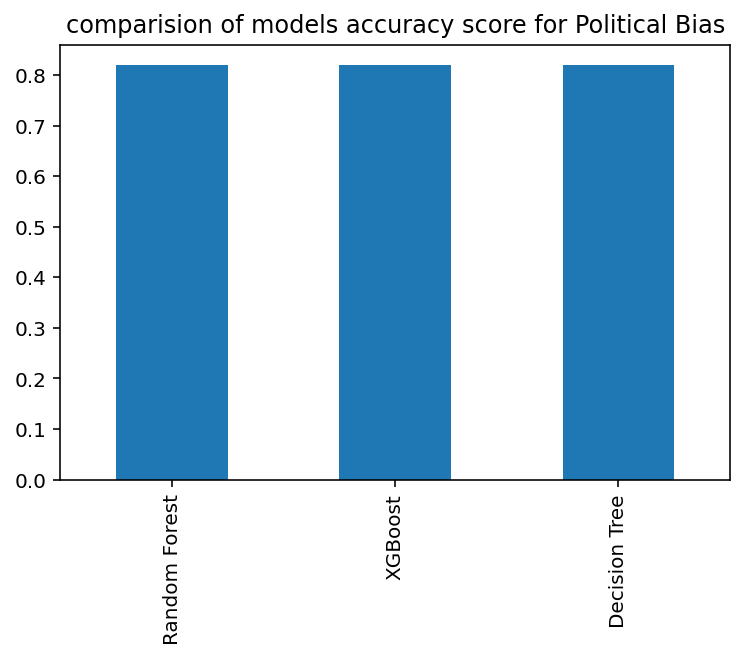

In [214]:
row.plot(kind='bar', title='comparision of models accuracy score for Political Bias')

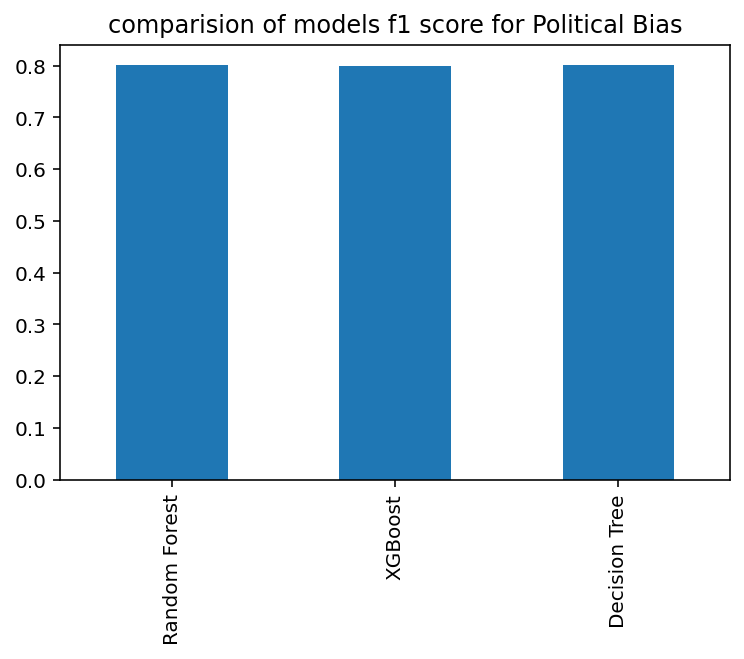

In [215]:
row = modelDF.iloc[1]
row.plot(kind='bar', title='comparision of models f1 score for Political Bias')

## Saving the model to pickle file

In [0]:
import pickle
#write to file
with open('/content/gdrive/My Drive/MLSpring2020/the_expendables_AirQuality_Traffic/rf_pb.pkl', 'wb') as f:
    pickle.dump(clf, f)

#read from file
with open('/content/gdrive/My Drive/MLSpring2020/the_expendables_AirQuality_Traffic/rf_pb.pkl', 'rb') as f:
    rf = pickle.load(f)

In [0]:
xtest.shape

(8554, 1)

In [0]:
y_pred = rf.predict(xtest)

## Verifying the accuracy the loaded model from pickle file

In [0]:
accuracy_score(y_test, y_pred)

0.8199672667757774

In [0]:
df.head(4)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
6240,mostly-true,22 times Barack Obama said he did not have the...,immigration,greg-abbott,governor,Texas,republican,11.0,3.0,8.0,6.0,5.0,an interview with Sean Hannity on Fox News,times barack obama said authority implement ty...
1695,barely-true,"Romneycare has killed 18,000 Massachusetts jobs.","health-care,jobs,message-machine-2012",rick-perry,Governor,Texas,republican,30.0,30.0,42.0,23.0,18.0,a campaign ad,romneycare killed massachusetts jobs
11068,TRUE,"When people enter the service, theres not a me...","health-care,military",michael-mccaul,congressman,Texas,republican,1.0,0.0,1.0,4.0,0.0,"comments on ""Fox News Sunday""",people enter service theres mental health eval...
2917,pants-fire,The Obama administration was actively supporti...,"foreign-policy,military,terrorism",donald-trump,President-Elect,New York,republican,63.0,114.0,51.0,37.0,61.0,a Facebook post,obama administration actively supporting al qa...


## Test data separation 

In [0]:
df = df.sort_index(axis=0)

## First 3000 rows are considered for model testing

In [0]:
df = df.iloc[0:3000, :]

In [0]:
df.tail()

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
2995,TRUE,"Before 2005, the percentage of Texas high scho...","children,education",don-willett,"Justice, Place 2, Texas Supreme Court",Texas,republican,0.0,0.0,0.0,0.0,0.0,the majority Texas Supreme Court opinion in Te...,percentage texas high school students meeting ...
2996,half-true,Obama's liberal fiscal agenda: Over $874-billi...,federal-budget,republican-national-committee-republican,NaN,NaN,republican,6.0,6.0,11.0,5.0,2.0,a graphic on the RNC website.,obamas liberal fiscal agenda billion new spending
2997,half-true,Tommy Thompson made millions from corporations...,"corporations,jobs,message-machine-2012,workers",majority-pac,NaN,NaN,democrat,1.0,0.0,1.0,0.0,0.0,a TV ad,tommy thompson millions corporations outsource...
2998,FALSE,Georgia has a well-deserved reputation for set...,food-safety,kevin-levitas,NaN,NaN,democrat,0.0,1.0,0.0,0.0,0.0,a press releaase,georgia welldeserved reputation setting gold s...
2999,barely-true,I asked the unions to pay into their own healt...,"health-care,labor,state-budget,state-finances",scott-walker,Milwaukee County Executive,Wisconsin,republican,26.0,41.0,32.0,40.0,11.0,a campaign fundraising letter,asked unions pay health care insurance said un...


In [0]:
def politicalbiasLabel(x):
  if (x == 'republican'):
    return 0.9
  elif (x == 'democrat'):
    return 0.7
  elif (x == 'libertarian'):
    return 0.5
  elif (x == 'organization'):
    return 0.2
  elif (x == 'independent'):
    return 0.4
  elif (x == 'state-official'):
    return 0.35
  else:
    return 0.1

In [0]:
df['politicalbias'] = df.party_affiliation.apply(politicalbiasLabel)

In [0]:
df.head(4)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement,politicalbias
0,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,says annies list political group supports thir...,0.9
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start started natural gas took st...,0.7
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agrees john mccain voting geor...,0.7
3,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legislation likely mandate ...,0.1


In [0]:
final_df = df[['politicalbias']]

In [0]:
final_df.head(4)

,politicalbias
0,0.9
1,0.7
2,0.7
3,0.1


In [0]:
x_test = final_df.values

In [0]:
x_test.shape

(3000, 1)

In [0]:
y_pred = rf.predict(x_test)

In [0]:
y_pred = y_pred.astype(int)

In [0]:
y_text = classlabel_encoder.inverse_transform(y_pred)

In [0]:
y_text.shape

(3000,)

In [0]:
base_dir

'/content/gdrive/My Drive/MLSpring2020/the_expendables_AirQuality_Traffic'

## Loading the csv file containing class verdict given the noderank feature

In [0]:
noderankdf = pd.read_csv(base_dir+'/Alternus_vera/Classification.csv')

In [0]:
noderankdf.head(3)

,Unnamed: 0,NodeRankClass
0,0,FALSE
1,1,half-true
2,2,mostly-true


In [0]:
noderankdf['politicalbiasClass'] = y_text

In [0]:
noderankdf.head(3)

,Unnamed: 0,NodeRankClass,politicalbiasClass
0,0,FALSE,FALSE
1,1,half-true,mostly-true
2,2,mostly-true,mostly-true


## Saving the political bias column to the final csv file

In [0]:
#with open(base_dir + '/Alternus_vera/Classification_2.csv', 'a') as f:
#  noderankdf.to_csv(f)